In [1]:
from GG_mthesis import *
%matplotlib inline

In [2]:
def obtain_distances(path):
    df = pd.read_csv(path, index_col=0, parse_dates=['datetime'])
    df['distance'] = np.insert(gsw.distance(df['lon'], df['lat']),0,0)
    df = df.reset_index()
    df = df[df['distance'] < 1000]
    #dist_limit = np.percentile(df['distance'], 95)
    #df = df[df['distance'] <= dist_limit]
    df = df[df['distance'] > 200].reset_index(drop=True)
    return df

In [3]:
#obtain_distances('data/02_intermediate/SOCAT/33LG20020322.csv').append(obtain_distances('data/02_intermediate/SOCAT/06AQ20120318.csv'))

In [3]:
path = 'data/02_intermediate/SOCAT'
from fileinput import filename
import os
data_all_raw = pd.DataFrame()
for file in os.listdir(path):
    filename = path +'/' + file
    df = pd.read_csv(filename, index_col=0, parse_dates=['datetime'])
    data_all_raw = data_all_raw.append(df)

In [3]:
path = 'data/02_intermediate/SOCAT'
from fileinput import filename
import os
data_all = pd.DataFrame()
for file in os.listdir(path):
    filename = path +'/' + file
    data_all = data_all.append(obtain_distances(filename))

data_all['distance2'] = np.insert(gsw.distance(data_all['lon'], data_all['lat']),0,0)
data_all

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/853105416.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = data_all.append(obtain_distances(filename))
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is depreca

datetime      Expocode QC_Flag       lon       lat  \
0  2021-01-05 05:27:00   69920201226       C -66.21882 -55.72591   
1  2021-01-05 05:28:00   69920201226       C -66.21377 -55.72408   
2  2021-01-05 05:29:00   69920201226       C -66.20903 -55.72231   
3  2021-01-05 05:30:00   69920201226       C -66.20334 -55.72003   
4  2021-01-05 05:31:00   69920201226       C -66.19829 -55.71816   
..                 ...           ...     ...       ...       ...   
16 2019-02-28 06:50:00  74JC20190223       B -56.80170 -62.50980   
17 2019-02-28 06:55:00  74JC20190223       B -56.80560 -62.51410   
18 2019-02-28 08:54:00  74JC20190223       B -56.81320 -62.51190   
19 2019-02-28 09:16:00  74JC20190223       B -56.79000 -62.50270   
20 2019-02-28 13:07:00  74JC20190223       B -56.67110 -62.17050   

    sample_depth [m]     sal      T  Tequ [deg.C]  WOA_SSS  ETOPO2_depth [m]  \
0                NaN  33.961  6.574           NaN   33.555             509.0   
1                NaN  33.961  6.574           NaN   33.555             517.0   
2                NaN  33.960  6.575           NaN   33.555             525.0   
3                NaN  33.956  6.576           NaN   33.555             534.0   
4                NaN  33.961  6.574           NaN   33.555             541.0   
..               ...     ...    ...           ...      ...               ...   
16               NaN  34.170 -0.060          0.85   34.065             562.0   
17               NaN  34.170 -0.060          0.54   34.065             540.0   
18               NaN  34.170  0.340          0.66   34.065             561.0   
19               NaN  34.160  0.070          0.87   34.065             585.0   
20               NaN  34.230  1.110          1.82   34.065            1065.0   

    dist_to_land [km]         SA        CT          rho    distance  \
0                64.0  34.121519  6.580468  1026.659032  359.565243   
1                64.0  34.121519  6.580468  1026.659032  376.048655   
2                64.0  34.120515  6.581482  1026.658111  356.158584   
3                64.0  34.116496  6.582537  1026.654825  437.332208   
4                64.0  34.121519  6.580468  1026.659031  378.513846   
..                ...        ...       ...          ...         ...   
16               80.0  34.335342 -0.056436  1027.443967  435.211506   
17               80.0  34.335342 -0.056436  1027.443967  518.344343   
18               80.0  34.335339  0.343516  1027.422448  460.411170   
19               81.0  34.325294  0.073592  1027.429145  517.716545   
20               95.0  34.395565  1.113072  1027.423203  237.738349   

       distance2  
0       0.000000  
1     376.048655  
2     356.158584  
3     437.332208  
4     378.513846  
..           ...  
16   4176.797931  
17    518.344343  
18    460.411170  
19   1569.948468  
20  37445.467171  

[331207 rows x 17 columns]

In [23]:
print('Distance mean = ' + str(data_all['distance'].mean()) + ' m')
print('Distance median = ' + str(data_all['distance'].median()) + ' m')
print('Distance min = ' + str(data_all['distance'].min()) + ' m')
print('Distance max = ' + str(data_all['distance'].max()) + ' m')

Distance mean = 770.8008950639955 m
Distance median = 839.0860975965979 m
Distance min = 200.0274522763275 m
Distance max = 999.9998240278604 m


In [7]:
len(data_all['Expocode'].unique())

150

In [4]:
data_all = data_all.loc[data_all['QC_Flag'].isin(['A','B'])]
data_all = data_all[data_all['dist_to_land [km]'] > 50]

In [ ]:
data_topo = data_all[data_all['ETOPO2_depth [m]'] > 3000]

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


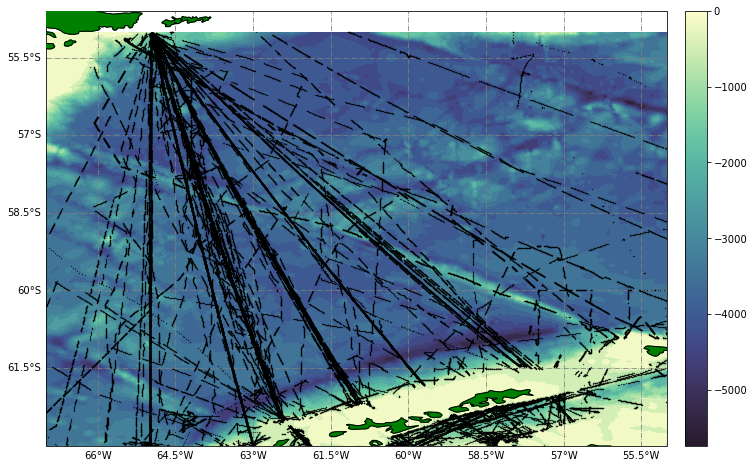

In [24]:
data_topo = data_all[data_all['ETOPO2_depth [m]'] > 500]

from GG_mthesis.d01_data.processing import rmap 
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=projection)
bx = ax.scatter(data_topo['lon'], data_topo['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)
ax.coastlines(zorder=100)
ax.add_feature(cartopy.feature.LAND, color='green', zorder=50)
gl = ax.gridlines(draw_labels=True, linestyle='-.', color='gray')
gl.xlabels_top = False
gl.ylabels_right = False

#bathy
from matplotlib.cm import ScalarMappable
filepath_bath='data/01_raw/ETOPO1_Bed_g_gmt4.grd'
bath = rmap.load(filepath_bath)
lon_min = -67
lon_max = -55
lat_min = -63
lat_max = -55
bath = rmap.select_region(bath, lon_min, lon_max, lat_min, lat_max)
import cmocean.cm as cm
x = bath.x
y = bath.y
z = bath.z
vmin = z.min()
vmax = z.max()
topo_f = ax.contourf(x, y, z, 
        cmap = cm.deep_r,
            vmin = vmin,
            vmax = 0,
        #    norm=MidpointNormalize(
        #        midpoint=-1000,
        #        vmin=vmin,lines
        #        vmax=0
        #     ),
        levels=20
        )
plt.colorbar(ScalarMappable(norm=topo_f.norm, cmap=topo_f.cmap), pad=0.02)


In [5]:
cruise_len = []
for cruise in data_all['Expocode'].unique():
    cruise_len.append(len(data_all[data_all['Expocode'] == cruise]))

In [6]:
np.max(cruise_len)*700/1000

2452.8

In [25]:
def calc_bx(df):
    g = 9.81 #m s-2
    rho_0 = 1027 #kg m-3
    df['bx'] = np.abs((g/rho_0)*df['rho'].diff()/df['distance'])
    return df

In [9]:
def calc_bx(df):
    g = 9.81 #m s-2
    rho_0 = 1027 #kg m-3
    df['bx'] = (g/rho_0)*df['rho'].diff()/df['distance']
    return df

In [132]:
#def calc_bx(df):
#    g = 9.81 #m s-2
#    rho_0 = 1027 #kg m-3
#    df['bx'] = np.abs((g/rho_0)*df['rho'].diff()/df['distance'])
#    return df
#
#def segment_cruise(df):
#    
#    from GG_mthesis.SOCAT_processing import SOCAT
#    index_dist = df[df['distance2'] > 1000].index
#    if len(index_dist) > 0:
#        df_ini = df[:index_dist[0]]
#        #df_ini = calc_bx(df_ini)
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        for i in range(len(index_dist)-1):
#            df_aux = df[index_dist[i]:index_dist[i+1]]
#            df_aux['distance_cum'] = df_aux['distance'].cumsum()
#            df_aux = SOCAT.downsample(df_aux, 1000)
#            df_aux = calc_bx(df_aux)A
#            df_ini = df_ini.append(df_aux)
#        return df_ini
#    else:
#        df_ini = calc_bx(df)
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#
#        return df_ini

In [11]:
#def calc_bx(df, distance=1000):
#    g = 9.81 #m s-2
#    rho_0 = 1027 #kg m-3
#    df['bx'] = np.abs((g/rho_0)*df['rho'].diff()/distance)
#    return df
#
#def segment_cruise(df):
#    from GG_mthesis.SOCAT_processing import SOCAT
#    index_dist = df[df['distance2'] > 1000].index
#    if len(index_dist) > 0:
#        df_ini = df[:index_dist[0]]
#        #df_ini = calc_bx(df_ini)
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        for i in range(len(index_dist)-1):
#            df_aux = df[index_dist[i]:index_dist[i+1]]
#            if len(df_aux) > 1:
#                df_aux['distance_cum'] = df_aux['distance'].cumsum()
#                df_aux = SOCAT.downsample(df_aux, 1000)
#                df_aux = calc_bx(df_aux)
#                df_ini = df_ini.append(df_aux)
#        return df_ini
#    else:
#        df_ini = df
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        df_ini = SOCAT.downsample(df_ini, 1000)
#        df_ini = calc_bx(df)
#        return df_ini

In [39]:
#def calc_bx(df, distance=1000):
#    g = 9.81 #m s-2
#    rho_0 = 1027 #kg m-3
#    df['bx'] = np.abs((g/rho_0)*df['rho'].diff()/distance)
#    return df
#
#def segment_cruise(df):
#    from GG_mthesis.SOCAT_processing import SOCAT
#    index_dist = df[df['distance2'] > 1000].index
#    if len(index_dist) > 0:
#        df_ini = df[:index_dist[0]]#
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        if len(df_ini) > 1:
#            df_ini = SOCAT.downsample(df_ini, 1000)
#            df_ini = calc_bx(df_ini)
#            #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
#        for i in range(len(index_dist)-1):
#            df_aux = df[index_dist[i]:index_dist[i+1]]
#            if len(df_aux) > 3:
#                df_aux['distance_cum'] = df_aux['distance'].cumsum()
#                df_aux = SOCAT.downsample(df_aux, 1000)
#                df_aux = calc_bx(df_aux)
#                #df_aux['distance'] = np.insert(gsw.distance(df_aux['lon'], df_aux['lat']),0,0)
#                df_ini = df_ini.append(df_aux)
#        return df_ini
#    else:
#        df_ini = df
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        df_ini = SOCAT.downsample(df_ini, 1000)
#        df_ini = calc_bx(df)
#        #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
#        return df_ini

In [20]:
#NOT IN USE, USE THE OTHER ONE
def segment_cruise(df):
    from GG_mthesis.SOCAT_processing import SOCAT
    index_dist = df[df['distance2'] > 1000].index
    if len(index_dist) > 0:
        df_ini = df[:index_dist[0]]
        df_ini['distance_cum'] = df_ini['distance'].cumsum()
        if len(df_ini) > 2:
            df_ini = SOCAT.downsample(df_ini, 1000)
            df_ini = calc_bx(df_ini)
            #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
        for i in range(len(index_dist)-1):
            df_aux = df[index_dist[i]:index_dist[i+1]]
            if len(df_aux) > 2:
                df_aux['distance_cum'] = df_aux['distance'].cumsum()
                df_aux = SOCAT.downsample(df_aux, 1000)
                df_aux = calc_bx(df_aux)
                #df_aux['distance'] = np.insert(gsw.distance(df_aux['lon'], df_aux['lat']),0,0)
                df_ini = df_ini.append(df_aux)
        return df_ini
    else:
        
        df['distance_cum'] = df['distance'].cumsum()
        df = SOCAT.downsample(df, 1000)
        df = calc_bx(df)
        #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
        return df

In [32]:
data_all

datetime      Expocode QC_Flag      lon      lat  \
0  2008-03-30 10:39:27  06AQ20080209       B -57.1094 -62.5292   
1  2008-03-30 10:41:44  06AQ20080209       B -57.1266 -62.5266   
2  2008-03-30 10:46:38  06AQ20080209       B -57.1634 -62.5210   
3  2008-03-30 10:48:54  06AQ20080209       B -57.1804 -62.5184   
4  2008-03-30 10:51:11  06AQ20080209       B -57.1976 -62.5158   
..                 ...           ...     ...      ...      ...   
16 2019-02-28 06:50:00  74JC20190223       B -56.8017 -62.5098   
17 2019-02-28 06:55:00  74JC20190223       B -56.8056 -62.5141   
18 2019-02-28 08:54:00  74JC20190223       B -56.8132 -62.5119   
19 2019-02-28 09:16:00  74JC20190223       B -56.7900 -62.5027   
20 2019-02-28 13:07:00  74JC20190223       B -56.6711 -62.1705   

    sample_depth [m]     sal      T  Tequ [deg.C]  WOA_SSS  ETOPO2_depth [m]  \
0                NaN  34.178  0.361          1.45   34.092             896.0   
1                NaN     NaN  0.442          1.46   34.092             934.0   
2                NaN     NaN  0.494          1.51   34.092             997.0   
3                NaN     NaN  0.504          1.52   34.092            1015.0   
4                NaN     NaN  0.483          1.50   34.092            1028.0   
..               ...     ...    ...           ...      ...               ...   
16               NaN  34.170 -0.060          0.85   34.065             562.0   
17               NaN  34.170 -0.060          0.54   34.065             540.0   
18               NaN  34.170  0.340          0.66   34.065             561.0   
19               NaN  34.160  0.070          0.87   34.065             585.0   
20               NaN  34.230  1.110          1.82   34.065            1065.0   

    dist_to_land [km]         SA        CT          rho    distance  \
0                77.0  34.343314  0.364476  1027.427653  928.378545   
1                77.0        NaN       NaN          NaN  928.451720   
2                77.0        NaN       NaN          NaN  928.609323   
3                77.0        NaN       NaN          NaN  918.935941   
4                76.0        NaN       NaN          NaN  928.755664   
..                ...        ...       ...          ...         ...   
16               80.0  34.335342 -0.056436  1027.443967  435.211506   
17               80.0  34.335342 -0.056436  1027.443967  518.344343   
18               80.0  34.335339  0.343516  1027.422448  460.411170   
19               81.0  34.325294  0.073592  1027.429145  517.716545   
20               95.0  34.395565  1.113072  1027.423203  237.738349   

        distance2  
0   937498.463904  
1      928.451720  
2     1987.993777  
3      918.935941  
4      928.755664  
..            ...  
16    4176.797931  
17     518.344343  
18     460.411170  
19    1569.948468  
20   37445.467171  

[176735 rows x 17 columns]

In [8]:
def downsample(df, gridsize):
    """
    Grids the data to a equally distance grid.

    Args:
        df (pd.dataframe): pandas dataframe with the North-South sorted TSG transect.
        gridsize (float): the desired distance it should be gridded to.

    Returns:
        pd.dataframe: gridded data.
    """
    from scipy.interpolate import griddata
    from datetime import datetime
    import math as m
    #create the distance grid
    distance_grid = np.arange(0, float(np.max(df.distance_cum)), gridsize)
    
    #we need to create a mask so the nans stay nans after gridding and are not interpolated
    df_mask = df.notna()[['rho', 'distance_cum']]
    df_mask['distance_cum'] = df['distance_cum']
    grid_mask = griddata(df_mask['distance_cum'].values, df_mask['rho'].values, distance_grid, method='linear')

    rho = griddata(df['distance_cum'].values, df['rho'].values, distance_grid, method='linear')*grid_mask
    temp = griddata(df['distance_cum'].values, df['CT'].values, distance_grid, method='linear')*grid_mask
    sal = griddata(df['distance_cum'].values, df['SA'].values, distance_grid, method='linear')*grid_mask
    lon = griddata(df['distance_cum'].values, df['lon'].values, distance_grid, method='linear')
    lat = griddata(df['distance_cum'].values, df['lat'].values, distance_grid, method='linear')
    time_stamp_arr = np.array([df['datetime'].iloc[i].to_pydatetime().timestamp() for i in range(len(df['datetime']))])
    time = griddata(df['distance_cum'].values, time_stamp_arr, distance_grid, method='linear')
    time = [np.datetime64(datetime.fromtimestamp(time[i])) if m.isnan(time[i]) == False else np.NaN for i in range(len(time))]
    df_aux = pd.DataFrame(rho, columns=['rho'], index=distance_grid)
    df_aux['time'] = time
    df_aux['lon'] = lon
    df_aux['lat'] = lat
    df_aux['CT'] = temp
    df_aux['SA'] = sal
    return df_aux


In [64]:
#from cmath import nan
#import math as m
#from scipy.interpolate import griddata
#aux = data_all[data_all['Expocode'] == 69920201226]
#aux['distance_cum'] = aux['distance'].cumsum()
#distance_grid = np.arange(0, float(np.max(aux['distance_cum'])), 1000)
#time_stamp_arr = np.array([aux['datetime'].iloc[i].to_pydatetime().timestamp() for i in range(len(aux['datetime']))])
#time = griddata(aux['distance_cum'].values, time_stamp_arr, distance_grid, method='linear')
#time = [np.datetime64(datetime.fromtimestamp(time[i])) if m.isnan(time[i]) == False else np.NaN for i in range(len(time))]

In [13]:
def calc_bx(df, distance=1000):
    g = 9.81 #m s-2
    rho_0 = 1027 #kg m-3
    df['bx'] = (g/rho_0)*df['rho'].diff()/distance
    return df

def calc_bx_abs(df, distance=1000):
    g = 9.81 #m s-2
    rho_0 = 1027 #kg m-3
    df['bx_abs'] = np.abs((g/rho_0)*df['rho'].diff()/distance)
    return df

def segment_cruise(df):
    from GG_mthesis.SOCAT_processing import SOCAT
    index_dist = df[df['distance2'] > 1000].index
    if len(index_dist) > 0:
        df_ini = df[:index_dist[0]]
        df_ini['distance_cum'] = df_ini['distance'].cumsum()
        if len(df_ini) > 10:
            df_ini = downsample(df_ini, 1000)
            df_ini = calc_bx(df_ini)
            df_ini = calc_bx_abs(df_ini)
            df_ini['T_diff'] = df_ini['CT'].diff()
            df_ini['S_diff'] = df_ini['SA'].diff()
            #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
        for i in range(len(index_dist)-1):
            df_aux = df[index_dist[i]:index_dist[i+1]]
            if len(df_aux) > 10:
                df_aux['distance_cum'] = df_aux['distance'].cumsum()
                df_aux = downsample(df_aux, 1000)
                df_aux = calc_bx(df_aux)
                df_aux = calc_bx_abs(df_aux)
                df_aux['T_diff'] = df_aux['CT'].diff()
                df_aux['S_diff'] = df_aux['SA'].diff()
                #df_aux['distance'] = np.insert(gsw.distance(df_aux['lon'], df_aux['lat']),0,0)
                df_ini = df_ini.append(df_aux)
        return df_ini
    else:
        
        df['distance_cum'] = df['distance'].cumsum()
        df = downsample(df, 1000)
        df = calc_bx(df)
        df = calc_bx_abs(df)
        df['T_diff'] = df['CT'].diff()
        df['S_diff'] = df['SA'].diff()
        #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
        return df

#aux = data_all[data_all['Expocode'] == 69920201226]
#aux_1 = segment_cruise(aux)
#aux_1.dropna(axis='columns', how='all').dropna(axis='rows')

In [14]:
data_gridded = pd.DataFrame()
cruise_ids = data_all['Expocode'].unique()
for id in cruise_ids:
    df_cruise = data_all[data_all['Expocode'] == id]
    print(id)
    if len(df_cruise) > 10:
        df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
        aux = segment_cruise(df_cruise)
        aux['cruise_id'] = id
        data_gridded = data_gridded.append(aux)
        
data_gridded = data_gridded.reset_index()
drop_index = data_gridded.where(data_gridded['distance_cum'].notna()).dropna(axis='rows', how='all').index
data_gridded = data_gridded.drop(drop_index).dropna(axis='columns', how='all').dropna(subset=['bx']).reset_index().drop(columns=['level_0','index'])

06AQ20080209


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

06AQ20090322


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

06AQ20120318


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620000409


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

320620000609


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

320620000702


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620010423


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620010907


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620011109
320620011205


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620020118


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620020409


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

320620020801


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620050402
320620160110


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620160211


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620160401


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

320620160805


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

320620160907


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

320620200128
320620201112
33LG20020307


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20041108


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20041124


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20041231


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20050519


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

33LG20050614


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20060214


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20060321


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20060426


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20060514


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20060620


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20060806


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20060916


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20061006


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20061029


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20061113


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20061206


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20070102


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20070308


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20070606


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20071104


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20071122


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20080215


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20080409


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20080427


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20080528


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20080624


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20080711


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20080813


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20080914


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20081016


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20081231


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20090212


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20090322


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20090412


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20090616


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20090914


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20090917


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20091123


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20091229


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20100410


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20100504


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20100913


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20101006


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20101113
33LG20101125


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20110102


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20110214


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20110324


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20110413


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20110503


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20120317


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20120408


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20120503
33LG20120606


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_gridded = data_gridded.append(aux)
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy arr

33LG20120918


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

33LG20121010
33LG20121105


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_gridded = data_gridded.append(aux)
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

33LG20121231


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20130512


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20130601


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20130914


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20131005


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20131027


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20131123


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20140101


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20140214


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20140322


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20140623


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20140914


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20141008


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20141028


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20141128


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20141230


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20150214


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20150321


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20150408


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20150516


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20150621


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20151002


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20151023


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20151118


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20160221


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20160329


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20160417


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20160521


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20160626


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20161003


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20161022


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20161109


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20161203


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20161230


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20170214


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20170325


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20170413


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20170712


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20170812


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20170909
33LG20171021


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20171114


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20171209


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20171230


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20180216


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20180324


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20180413


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20180519


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20181002


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20181021


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20181107


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20181206


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20181230


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20190216


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20190326


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20190415


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20191002


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33LG20191021


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20191108


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

33LG20191202


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20191230


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20200216


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

33LG20200603


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

33LG20201201


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

33RO20131223


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

58US20190228


C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['distance_cum'] = df_aux['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ini = df_ini.append(df_aux)
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1349876681.py:29: SettingWithCopyWarning: 
A value is trying to be set 

74JC20130109
74JC20130318
74JC20161110
74JC20181103
74JC20190223


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
C:\Users\gian_\AppData\Local\Temp/ipykernel_15132/1519867919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'],

In [15]:
data_gridded

lon        lat         SA        CT          rho  \
0      -57.294120 -62.500913  34.342633  0.350104  1027.427922   
1      -57.312505 -62.497946  34.341549  0.359767  1027.426506   
2      -57.330907 -62.495002  34.340460  0.369481  1027.425081   
3      -57.349528 -62.492378  34.340231  0.375702  1027.424544   
4      -57.368311 -62.490010  34.341134  0.380103  1027.425017   
...           ...        ...        ...       ...          ...   
115386 -57.772283 -55.786798  34.311949  5.050515  1026.997363   
115387 -57.739134 -55.797232  34.311955  4.986319  1027.004721   
115388 -57.702873 -55.806750  34.311962  4.724459  1027.034189   
115389 -57.668481 -55.814532  34.301920  4.629977  1027.036658   
115390 -57.690229 -55.817710  34.300106  4.960904  1026.998285   

                             time            bx        bx_abs    T_diff  \
0      2008-03-30 11:03:58.960871 -1.361252e-08  1.361252e-08  0.009733   
1      2008-03-30 11:06:25.622327 -1.352605e-08  1.352605e-08  0.009663   
2      2008-03-30 11:08:52.653996 -1.360813e-08  1.360813e-08  0.009714   
3      2008-03-30 11:11:18.424166 -5.136041e-09  5.136041e-09  0.006221   
4      2008-03-30 11:13:43.022823  4.524459e-09  4.524459e-09  0.004401   
...                           ...           ...           ...       ...   
115386 2018-11-05 07:38:27.424749  3.355100e-09  3.355100e-09 -0.003051   
115387 2018-11-05 08:59:08.745235  7.027874e-08  7.027874e-08 -0.064195   
115388 2018-11-05 10:20:20.456466  2.814821e-07  2.814821e-07 -0.261861   
115389 2018-11-05 12:18:35.508688  2.358154e-08  2.358154e-08 -0.094482   
115390 2018-11-05 19:02:09.588260 -3.665368e-07  3.665368e-07  0.330927   

              S_diff     cruise_id  
0      -1.091588e-03  06AQ20080209  
1      -1.083770e-03  06AQ20080209  
2      -1.089432e-03  06AQ20080209  
3      -2.294864e-04  06AQ20080209  
4       9.037181e-04  06AQ20080209  
...              ...           ...  
115386  8.965871e-07  74JC20181103  
115387  6.167227e-06  74JC20181103  
115388  6.265932e-06  74JC20181103  
115389 -1.004180e-02  74JC20181103  
115390 -1.813600e-03  74JC20181103  

[115391 rows x 11 columns]

In [55]:
data_gridded.to_csv('data/03_processed/SOCAT/data_gridded_distance')

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


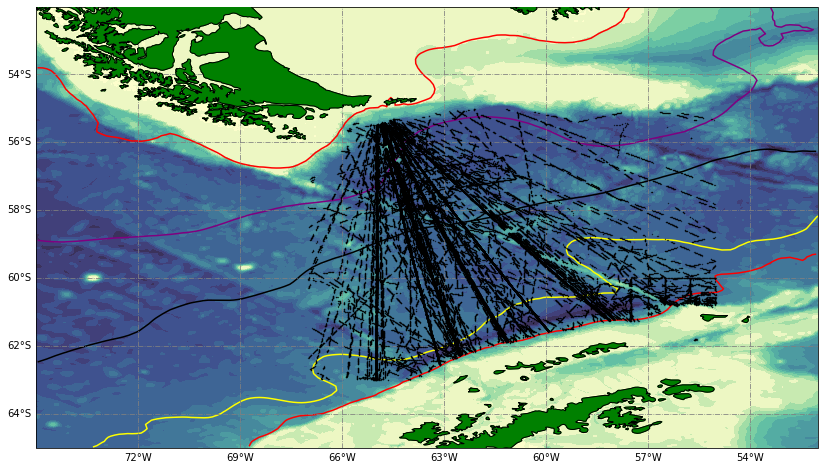

In [121]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
ax.scatter(data_gridded['lon'], data_gridded['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

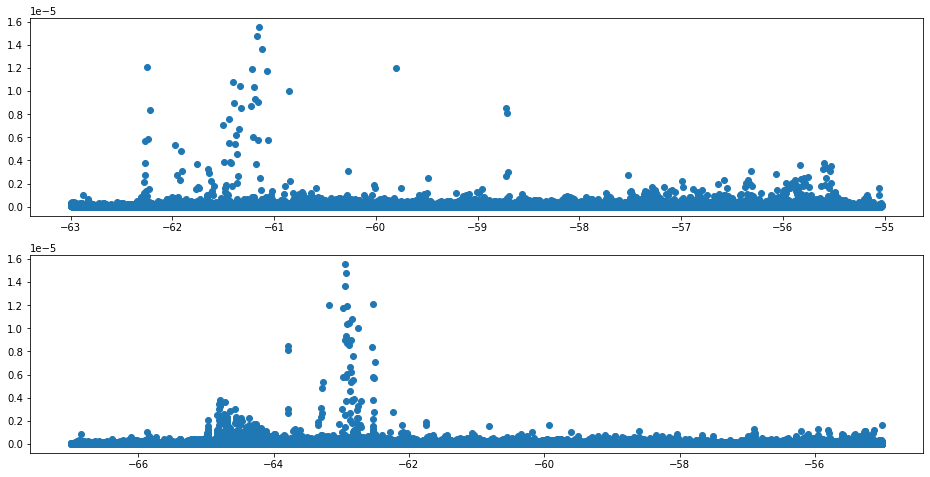

In [128]:
fig, (ax0, ax1) = plt.subplots(figsize=(16,8), nrows=2)
ax0.scatter(data_gridded['lat'], data_gridded['bx'])
ax1.scatter(data_gridded['lon'], data_gridded['bx'])

#ax.set_yscale('log')

In [65]:
data_all['distance'].mean()

761.075471107067

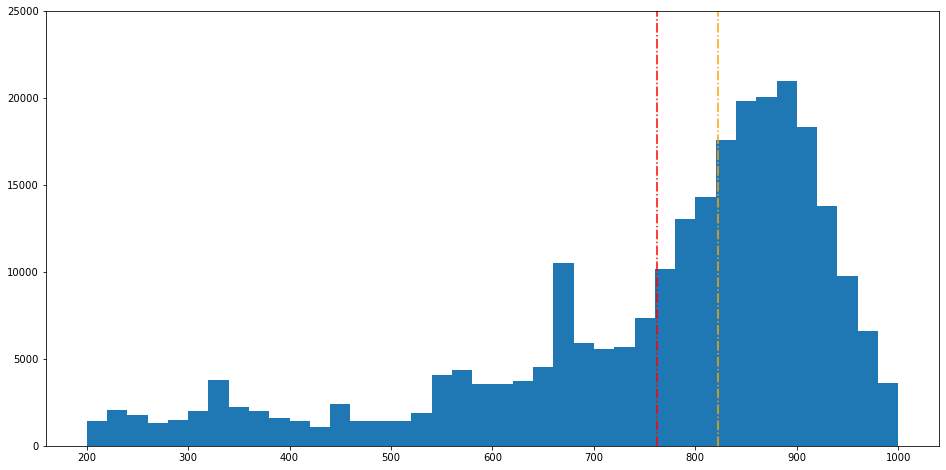

In [7]:

dist_mean = data_all['distance'].mean()
dist_median = data_all['distance'].median()

#Let´s plot bx along the track.
fig, ax0 = plt.subplots(nrows=1,figsize=(16,8))
plt.subplots_adjust(hspace=0.35)

ax0.hist(data_all['distance'],
         bins=40, #np.arange(200,1001,50),
         #density=True
         )
ax0.vlines(dist_mean, 0, 25000,
           color='red',
           linestyle='-.')
ax0.vlines(dist_median, 0, 25000,
           color='orange',
           linestyle='-.')
ax0.set_ylim(0,25000)
plt.show()


In [29]:
data_all

datetime      Expocode QC_Flag       lon       lat  \
0  2021-01-05 07:42:00   69920201226       C -65.69037 -55.47937   
1  2021-01-05 07:43:00   69920201226       C -65.68552 -55.47758   
2  2021-01-05 07:44:00   69920201226       C -65.68065 -55.47582   
3  2021-01-05 07:45:00   69920201226       C -65.67589 -55.47419   
4  2021-01-05 07:46:00   69920201226       C -65.67108 -55.47243   
..                 ...           ...     ...       ...       ...   
7  2018-12-03 10:49:00  74JC20181202       C -57.98340 -55.18830   
8  2018-12-27 20:04:00  74JC20181202       C -66.05740 -61.12980   
9  2018-12-27 20:35:00  74JC20181202       C -66.07300 -61.06750   
10 2018-12-28 08:37:00  74JC20181202       C -65.77270 -59.33140   
11 2018-12-28 23:32:00  74JC20181202       C -65.78190 -59.32690   

    sample_depth [m]     sal      T  Tequ [deg.C]  WOA_SSS  ETOPO2_depth [m]  \
0                NaN  34.012  6.604           NaN   33.723            2567.0   
1                NaN  34.010  6.603           NaN   33.723            2620.0   
2                NaN  34.014  6.601           NaN   33.723            2653.0   
3                NaN  34.014  6.596           NaN   33.723            2670.0   
4                NaN  34.009  6.593           NaN   33.723            2687.0   
..               ...     ...    ...           ...      ...               ...   
7                NaN  34.130  5.890          7.03   34.058            3277.0   
8                NaN  33.790  2.290          3.23   33.768            3396.0   
9                NaN  33.770  2.080          2.75   33.768            3461.0   
10               NaN  33.830  2.060          2.82   33.867            3672.0   
11               NaN  33.840  2.440          3.19   33.867            3703.0   

    dist_to_land [km]         SA        CT          rho    distance  
0                62.0  34.172751  6.609784  1026.695273  369.175674  
1                62.0  34.170741  6.608811  1026.693829  364.725227  
2                62.0  34.174760  6.606755  1026.697247  363.989202  
3                62.0  34.174760  6.601753  1026.697908  350.485465  
4                62.0  34.169736  6.598820  1026.694362  360.828737  
..                ...        ...       ...          ...         ...  
7               345.0  34.291678  5.893964  1026.880428  737.115513  
8               336.0  33.951145  2.296199  1026.981646  997.985486  
9               340.0  33.931022  2.086244  1026.982262  995.464189  
10              402.0  33.990647  2.065807  1027.031323  281.895062  
11              401.0  34.000692  2.445889  1027.008837  698.942410  

[257471 rows x 16 columns]

In [28]:
data_all['Expocode'][6]

6     69920201226
6    06AQ20080209
6    06AQ20090322
6    06AQ20120318
6    06AQ20151207
         ...     
6    33RO20131223
6    58US20190228
6    74JC20161110
6    74JC20181103
6    74JC20181202
Name: Expocode, Length: 244, dtype: object

In [22]:
len(data_all[data_all['Expocode'] == '69920201226'])

0

In [16]:
for cruise in data_all['Expocode'].unique():
    

249

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


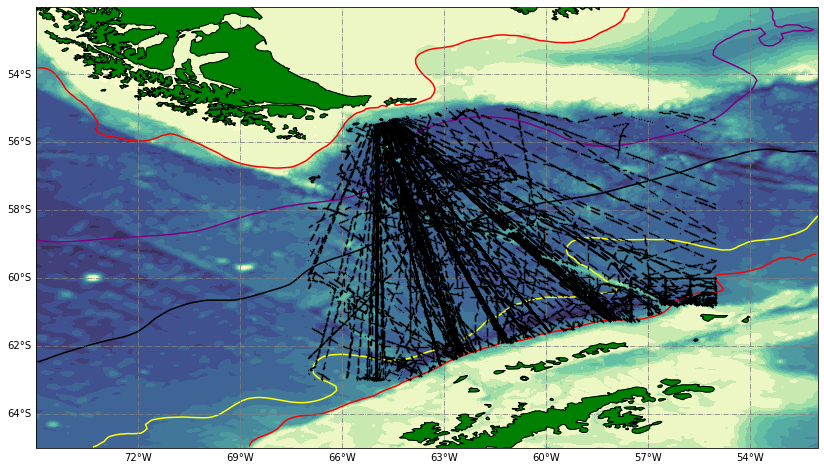

In [8]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
ax.scatter(data_all['lon'], data_all['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

In [39]:
df = pd.read_csv('data/02_intermediate/SOCAT/33LG20020322.csv', index_col=0, parse_dates=['datetime'])
df['distance'] = np.insert(gsw.distance(df['lon'], df['lat']),0,0)
#df = df[df['distance'] > 200]
df = df.reset_index()

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]
